In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
diabetes = pd.read_csv('Healthcare-Diabetes.csv')
diabetes.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


* `Id`: Unique identifier for each data entry.
* `Pregnancies`: Number of times pregnant.
* `Glucose`: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
* `BloodPressure`: Diastolic blood pressure (mm Hg).
* `SkinThickness`: Triceps skinfold thickness (mm).
* `Insulin`: 2-Hour serum insulin (mu U/ml).
* `BMI`: Body mass index (weight in kg / height in m^2).
* `DiabetesPedigreeFunction`: Diabetes pedigree function, a genetic score of diabetes.
* `Age`: Age in years.
* `Outcome`: Binary classification indicating the presence (1) or absence (0) of diabetes.

In [163]:
diabetes.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


* `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` and `BMI` has minimum value of zero (missing values).
* We need to find out how many percentage of missing values in each variable.

In [164]:
glucose = diabetes[diabetes['Glucose'] == 0]
zero_glucose = len(glucose)
zero_glucose_percent = (zero_glucose/len(diabetes))*100
print(f"The percentage of missing glucose value is {round(zero_glucose_percent,2)}%.")

bloodpressure = diabetes[diabetes['BloodPressure'] == 0]
zero_bloodpressure = len(bloodpressure)
zero_bloodpressure_percent = (zero_bloodpressure/len(diabetes))*100
print(f"The percentage of missing blood pressure value is {round(zero_bloodpressure_percent,2)}%.")

skinthickness = diabetes[diabetes['SkinThickness'] == 0]
zero_skinthickness = len(skinthickness)
zero_skinthickness_percent = (zero_skinthickness/len(diabetes))*100
print(f"The percentage of missing skin thickness value is {round(zero_skinthickness_percent,2)}%.")

insulin = diabetes[diabetes['Insulin'] == 0]
zero_insulin = len(insulin)
zero_insulin_percent = (zero_insulin/len(diabetes))*100
print(f"The percentage of missing insulin value is {round(zero_insulin_percent,2)}%.")

bmi = diabetes[diabetes['BMI'] == 0]
zero_bmi = len(bmi)
zero_bmi_percent = (zero_bmi/len(diabetes))*100
print(f"The percentage of missing BMI value is {round(zero_bmi_percent,2)}%.")

The percentage of missing glucose value is 0.65%.
The percentage of missing blood pressure value is 4.52%.
The percentage of missing skin thickness value is 28.9%.
The percentage of missing insulin value is 48.05%.
The percentage of missing BMI value is 1.41%.


* Only `Glucose`, `BloodPressure` and `BMI` can be safely removed from the DataFrame due to very low missing percentage value (_less than 5%_)

In [165]:
diabetes.drop(diabetes[diabetes['Glucose'] == 0].index, inplace=True)
diabetes.drop(diabetes[diabetes['BloodPressure'] == 0].index, inplace=True)
diabetes.drop(diabetes[diabetes['BMI'] == 0].index, inplace=True)

In [166]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2612 non-null   int64  
 1   Pregnancies               2612 non-null   int64  
 2   Glucose                   2612 non-null   int64  
 3   BloodPressure             2612 non-null   int64  
 4   SkinThickness             2612 non-null   int64  
 5   Insulin                   2612 non-null   int64  
 6   BMI                       2612 non-null   float64
 7   DiabetesPedigreeFunction  2612 non-null   float64
 8   Age                       2612 non-null   int64  
 9   Outcome                   2612 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 224.5 KB


In [167]:
# Calculate percentage of data loss from the dataset
dataloss_percent = (1 - (2612/2768))*100
print(f"Data loss percentage is {round(dataloss_percent,2)}%.")

Data loss percentage is 5.64%.


__Exploratory Data Analysis__

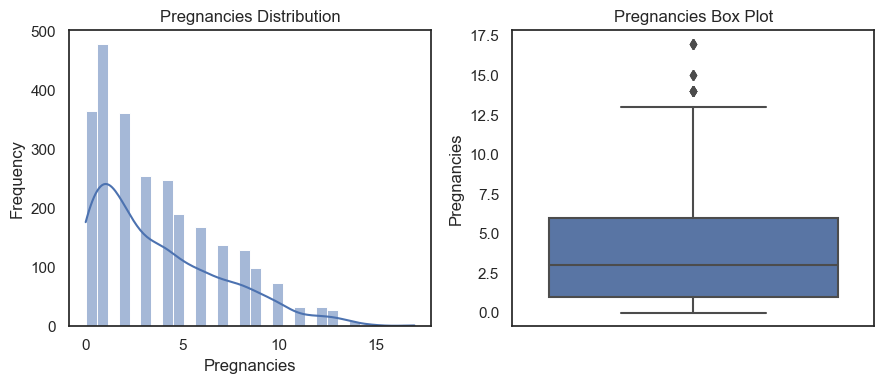

In [168]:
sns.set(style="white")

# Histogram for Pregnancies
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='Pregnancies',bins=30, kde=True)
plt.title('Pregnancies Distribution')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')

# Box plots for Pregnancies
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='Pregnancies')
plt.title('Pregnancies Box Plot')
plt.ylabel('Pregnancies')
plt.tight_layout()
plt.show()

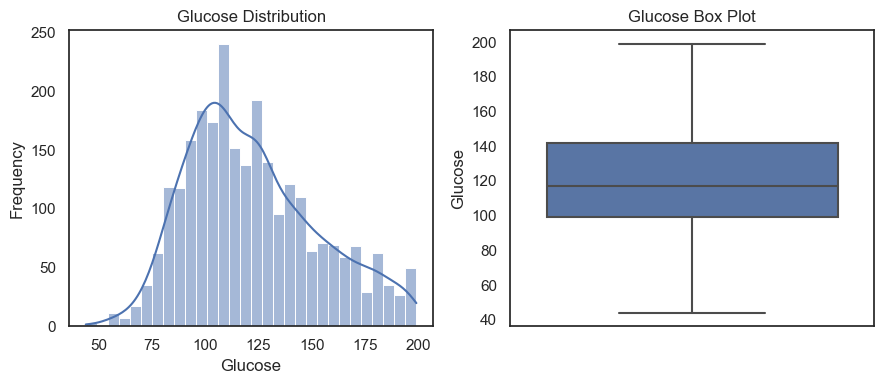

In [169]:
sns.set(style="white")

# Histogram for Glucose
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='Glucose',bins=30, kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

# Box plots for Glucose
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='Glucose')
plt.title('Glucose Box Plot')
plt.ylabel('Glucose')
plt.tight_layout()
plt.show()

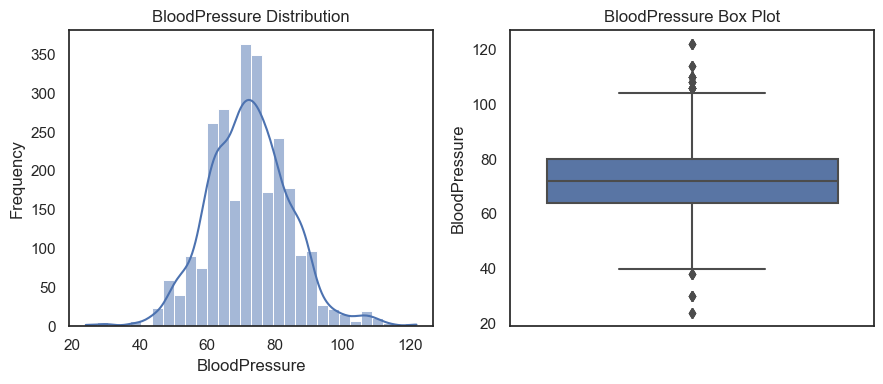

In [170]:
sns.set(style="white")

# Histogram for BloodPressure
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='BloodPressure',bins=30, kde=True)
plt.title('BloodPressure Distribution')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')

# Box plots for BloodPressure
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='BloodPressure')
plt.title('BloodPressure Box Plot')
plt.ylabel('BloodPressure')
plt.tight_layout()
plt.show()

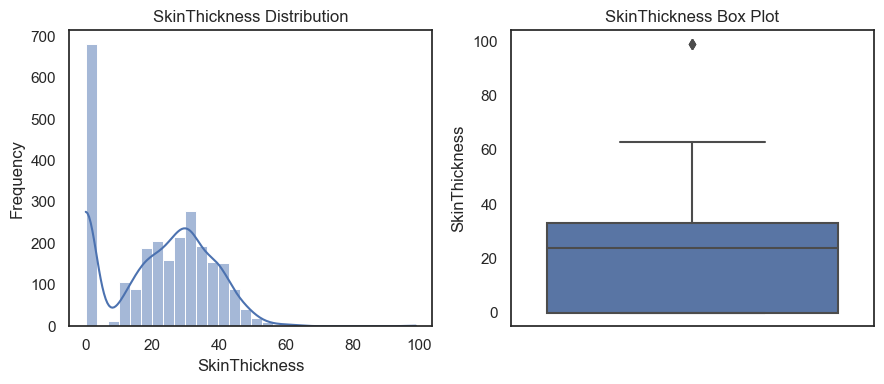

In [171]:
sns.set(style="white")

# Histogram for SkinThickness
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='SkinThickness',bins=30, kde=True)
plt.title('SkinThickness Distribution')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')

# Box plots for SkinThickness
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='SkinThickness')
plt.title('SkinThickness Box Plot')
plt.ylabel('SkinThickness')
plt.tight_layout()
plt.show()

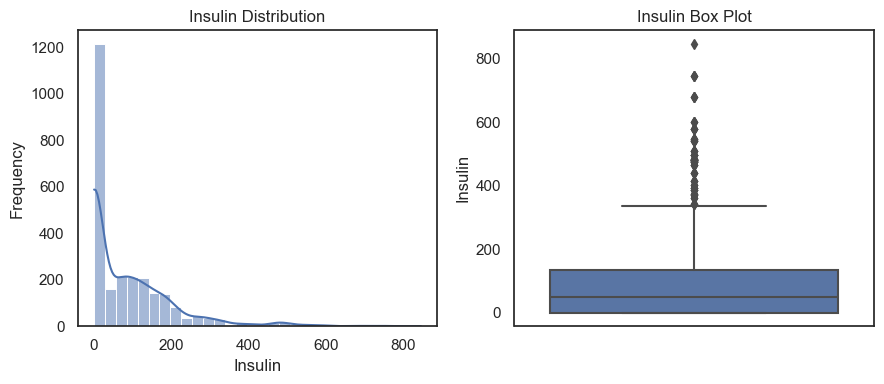

In [172]:
sns.set(style="white")

# Histogram for Insulin
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='Insulin',bins=30, kde=True)
plt.title('Insulin Distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')

# Box plots for Insulin
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='Insulin')
plt.title('Insulin Box Plot')
plt.ylabel('Insulin')
plt.tight_layout()
plt.show()

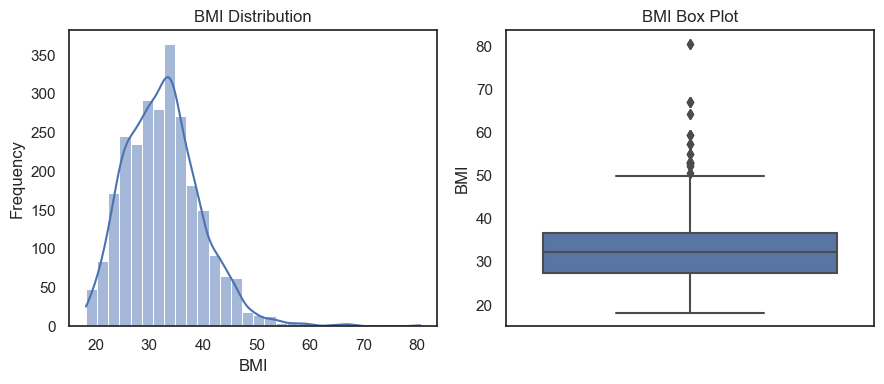

In [173]:
sns.set(style="white")

# Histogram for BMI
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='BMI',bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Box plots for BMI
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='BMI')
plt.title('BMI Box Plot')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

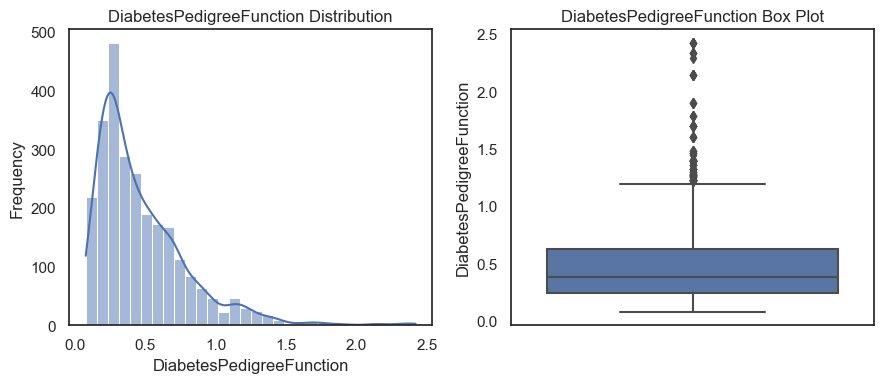

In [174]:
sns.set(style="white")

# Histogram for DiabetesPedigreeFunction
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='DiabetesPedigreeFunction',bins=30, kde=True)
plt.title('DiabetesPedigreeFunction Distribution')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

# Box plots for DiabetesPedigreeFunction
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='DiabetesPedigreeFunction')
plt.title('DiabetesPedigreeFunction Box Plot')
plt.ylabel('DiabetesPedigreeFunction')
plt.tight_layout()
plt.show()

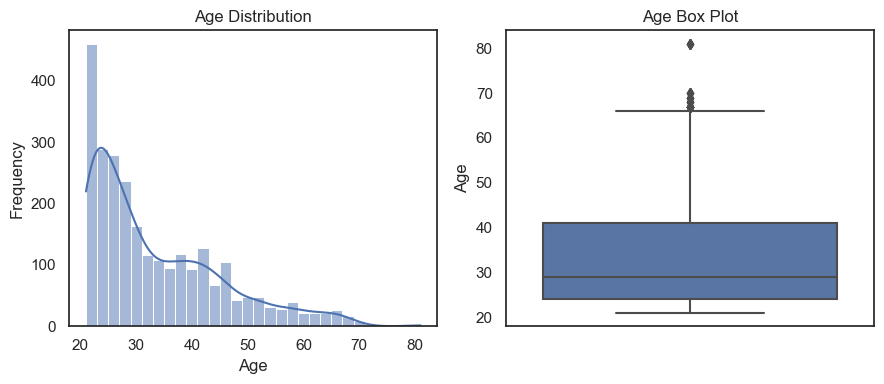

In [175]:
sns.set(style="white")

# Histogram for Age
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
sns.histplot(data=diabetes, x='Age',bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Box plots for Age
plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes, y='Age')
plt.title('Age Box Plot')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

* Many of the data distributions are not normal because the shapes of the distribution are skewed and box plots have outliers.
* Only `Glucose` have normal distribution of data.
* Data will be standardized to investigate the correlation between features

In [176]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(diabetes)

# Create a new DataFrame using the standardized features
df_standardized = pd.DataFrame(standardized_features, columns=diabetes.columns)

df_standardized.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-1.733756,0.669697,0.842370,-0.033967,0.854241,-0.742982,0.140172,0.471169,1.422496,1.393356
1,-1.732505,-0.836199,-1.205512,-0.522338,0.471145,-0.742982,-0.844276,-0.375679,-0.191524,-0.717692
2,-1.731254,1.272055,1.980081,-0.685129,-1.380485,-0.742982,-1.308373,0.609242,-0.106576,1.393356
3,-1.730003,-0.836199,-1.075487,-0.522338,0.088049,0.082689,-0.633323,-0.940244,-1.041008,-0.717692
4,-1.728751,-1.137378,0.484803,-2.638614,0.854241,0.732685,1.476210,5.567596,-0.021627,1.393356


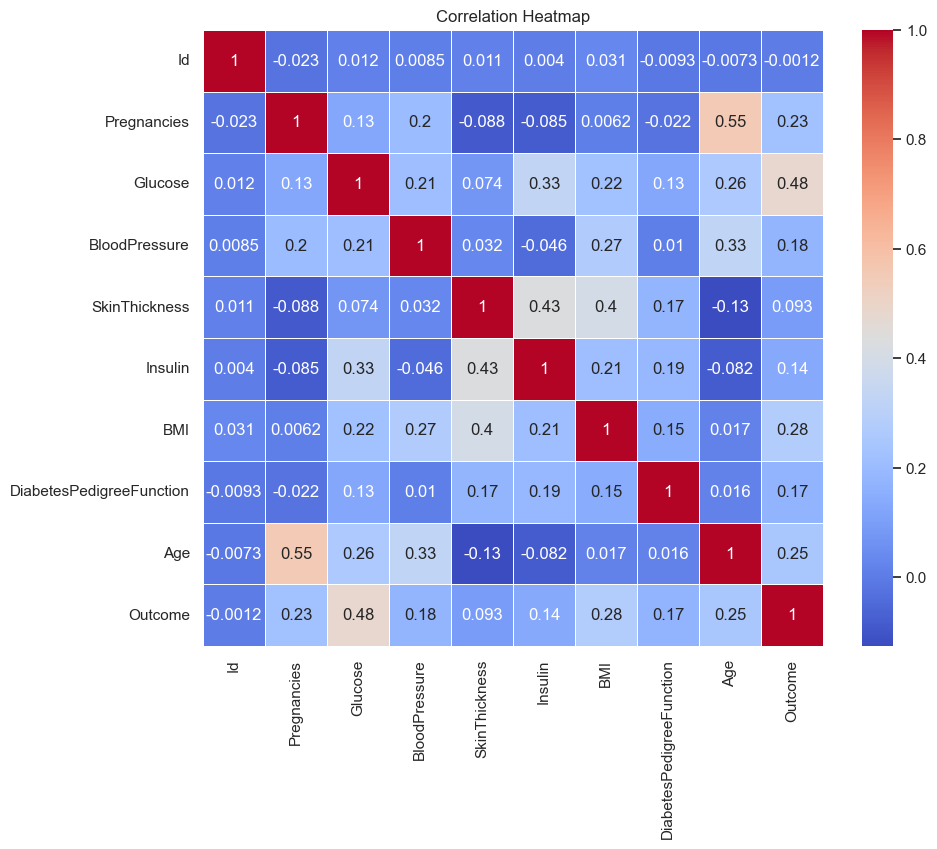

In [177]:
# Calculate the correlation matrix
corr_matrix = df_standardized.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

Since our main goal is to find what factors will affect the risk of developing diabetes, we will choose `Glucose` as the feature data and `Outcome` as the target data for the predictive model.

## Logistic Regression Model

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = diabetes[['Glucose']]
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Creating an instance of the Logistic Regression model
lr = LogisticRegression()

# Training the model on the training data
lr.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = lr.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7323135755258127


## L1 and L2 Regularization

In [206]:
# L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)

# Calculating the accuracy of the L1 regularization
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy of L1 regularization:", accuracy_l1)

# L2 Regularization
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)

# Calculating the accuracy of the L2 regularization
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy of L2 regularization:", accuracy_l2)

Accuracy of L1 regularization: 0.734225621414914
Accuracy of L2 regularization: 0.734225621414914


## Hyperparameter Tuning
* `GridSearchCV` will be used for hyperparameter tuning.

In [207]:
from sklearn.model_selection import GridSearchCV

# Create a logistic regression classifier
lr = LogisticRegression()

# Define the parameter grid
param_grid = {'C': np.logspace(-2, 2, 100)}

# Create the grid search object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'C': 0.01}
Best Accuracy: 0.7539499500877767


## Ensemble
* Stacking method is implemented for the ensembling method.

In [204]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X = diabetes[['Glucose']]
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Base models
base_model_lr = LogisticRegression()
base_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train base models on the training data
base_model_lr.fit(X_train, y_train)
base_model_rf.fit(X_train, y_train)
base_model_gb.fit(X_train, y_train)

# Make predictions using base models
pred_lr = base_model_lr.predict(X_test)
pred_rf = base_model_rf.predict(X_test)
pred_gb = base_model_gb.predict(X_test)

# Prepare the meta-features (predictions of base models)
meta_features = np.column_stack((pred_lr, pred_rf, pred_gb))

# Initialize the meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Train the meta-model on the meta-features
meta_model.fit(meta_features, y_test)

# Make predictions using base models and meta-model
final_pred_lr = base_model_lr.predict(X_test)
final_pred_rf = base_model_rf.predict(X_test)
final_pred_gb = base_model_gb.predict(X_test)
meta_features_test = np.column_stack((final_pred_lr, final_pred_rf, final_pred_gb))
ensemble_pred = meta_model.predict(meta_features_test)

# Calculating the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("Ensemble Accuracy:", ensemble_accuracy)

# Perform grid search on the meta-model (Logistic Regression)
param_grid = {'C': np.logspace(-2, 2, 100)}
grid_search = GridSearchCV(meta_model, param_grid, cv=5)
grid_search.fit(meta_features, y_test)

# Get the best parameters and accuracy for the meta-model
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters for Meta-model:", best_params)
print("Best Accuracy for Meta-model:", best_accuracy)


Ensemble Accuracy: 0.751434034416826
Best Parameters for Meta-model: {'C': 0.015922827933410922}
Best Accuracy for Meta-model: 0.7552197802197801


## Conclusion:
* We have successful improved accuracy from 73.2% to 75.5% by implementing stacking ensembling method.
* Glucose is the main factor that determines the risk of developing diabetes.